In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

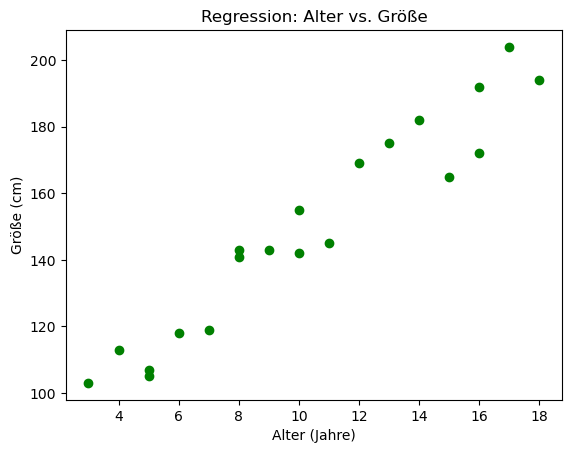

In [60]:
# Neuer Datensatz für Regression (Alter vs Größe) mit mehrfachen Alterswerten und mehr Varianz
alter = np.array([3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18])
groesse = np.array([95, 98, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190])

# Einfügen kleiner zufälliger Abweichungen in die Größen, um Varianz zu erzeugen
# np.random.seed(42)  # Für konsistente Zufallswerte
groesse += np.random.randint(-5, 20, size=groesse.shape)

# Regression Modell erstellen und trainieren
model_regression = LinearRegression()
model_regression.fit(alter.reshape(-1, 1), groesse)

# Vorhersagen für die Regression
groesse_vorhersage = model_regression.predict(alter.reshape(-1, 1))

# Plot für Regression
# plt.plot(alter, groesse_vorhersage, color='blue', linewidth=2)

# Plot für Regression
plt.scatter(alter, groesse, color='green')
# plt.plot(alter, groesse, color='green', marker='o')
plt.title('Regression: Alter vs. Größe')
plt.xlabel('Alter (Jahre)')
plt.ylabel('Größe (cm)')
plt.show()


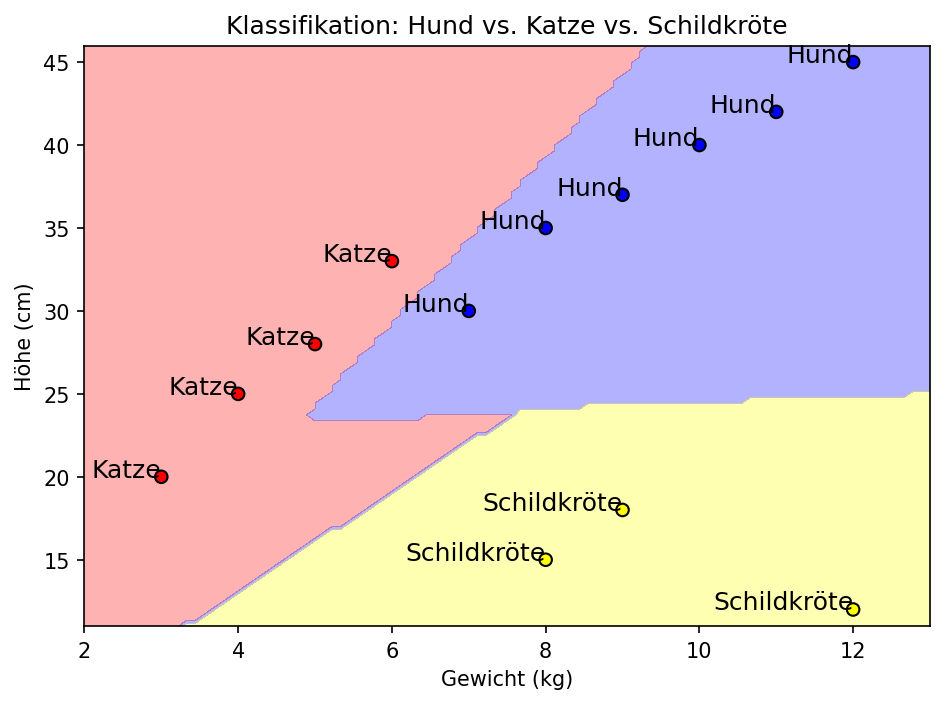

In [87]:

# Daten für Klassifikation (Gewicht vs Höhe)
gewicht = np.array([10, 4, 8, 3, 12, 7, 5, 6, 11, 9, 8, 12, 9])
höhe = np.array([40, 25, 35, 20, 45, 30, 28, 33, 42, 37, 15, 12, 18])
tier = ['Hund', 'Katze', 'Hund', 'Katze', 'Hund', 'Hund', 'Katze', 'Katze', 'Hund', 'Hund', 'Schildkröte', 'Schildkröte', 'Schildkröte']

# Farben für Klassifikation (Hund = Blau, Katze = Rot, Schildkröte = Gelb)
farben = ['blue' if t == 'Hund' else 'red' if t == 'Katze' else 'yellow' for t in tier]

# Neues Klassifikationsmodell (nicht-linear) mit SVC (RBF Kernel)
X_klassifikation = np.column_stack((gewicht, höhe))
y_klassifikation = np.array([1 if t == 'Hund' else 0 if t == 'Katze' else 2 for t in tier])
model_classification_multi = SVC(kernel='linear', decision_function_shape='ovo')
model_classification_multi.fit(X_klassifikation, y_klassifikation)

# Erstellen eines Meshgrids, um die Entscheidungsgrenzen zu visualisieren
x_min, x_max = gewicht.min() - 1, gewicht.max() + 1
y_min, y_max = höhe.min() - 1, höhe.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Vorhersagen für jedes Punkt im Raster
Z = model_classification_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot für Klassifikation
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1, 2], colors=['red', 'blue', 'yellow'])

# Datenpunkte plotten
plt.scatter(gewicht, höhe, color=farben, edgecolors='k')

# Tierlabels einfügen
for i, t in enumerate(tier):
    plt.text(gewicht[i], höhe[i], t, fontsize=12, ha='right')

plt.title('Klassifikation: Hund vs. Katze vs. Schildkröte')
plt.xlabel('Gewicht (kg)')
plt.ylabel('Höhe (cm)')

plt.tight_layout()
plt.show()

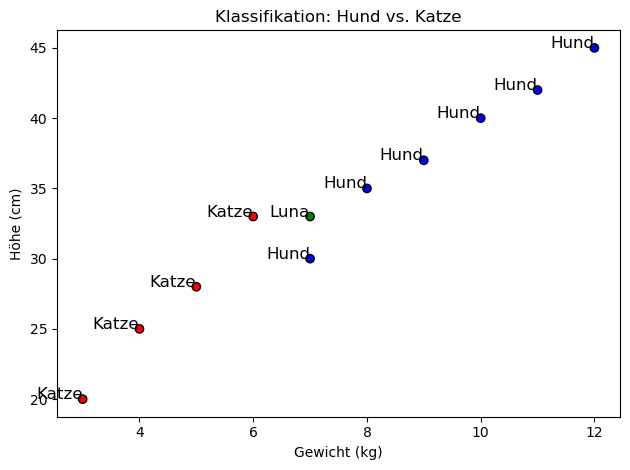

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Daten für Klassifikation (nur Hund und Katze, ohne Schildkröte)
gewicht = np.array([10, 4, 8, 3, 12, 7, 5, 6, 11, 9, 7])
höhe = np.array([40, 25, 35, 20, 45, 30, 28, 33, 42, 37, 33])
tier = ['Hund', 'Katze', 'Hund', 'Katze', 'Hund', 'Hund', 'Katze', 'Katze', 'Hund', 'Hund', 'Luna']

# Farben für Klassifikation (Hund = Blau, Katze = Rot, ? = Schwarz)
farben = ['blue' if t == 'Hund' else 'red' if t == 'Katze' else 'green' for t in tier]

# Klassifikationsmodell (linear) mit SVC
X_klassifikation = np.column_stack((gewicht, höhe))
y_klassifikation = np.array([1 if t == 'Hund' else 0 for t in tier])
model_classification = SVC(kernel='linear')
model_classification.fit(X_klassifikation, y_klassifikation)

# Erstellen eines Meshgrids, um die Entscheidungsgrenzen zu visualisieren
x_min, x_max = gewicht.min() - 1, gewicht.max() + 1
y_min, y_max = höhe.min() - 1, höhe.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Vorhersagen für jedes Punkt im Raster
Z = model_classification.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot für Klassifikation (Hund vs. Katze)
# plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
# plt.contourf(xx, yy, Z, alpha=0.3, levels=[-30, 0, 30], colors=['red', 'blue'])


# Datenpunkte plotten
plt.scatter(gewicht, höhe, color=farben, edgecolors='k')

# Tierlabels einfügen
for i, t in enumerate(tier):
    plt.text(gewicht[i], höhe[i], t, fontsize=12, ha='right')

plt.title('Klassifikation: Hund vs. Katze')
plt.xlabel('Gewicht (kg)')
plt.ylabel('Höhe (cm)')

plt.tight_layout()
plt.show()

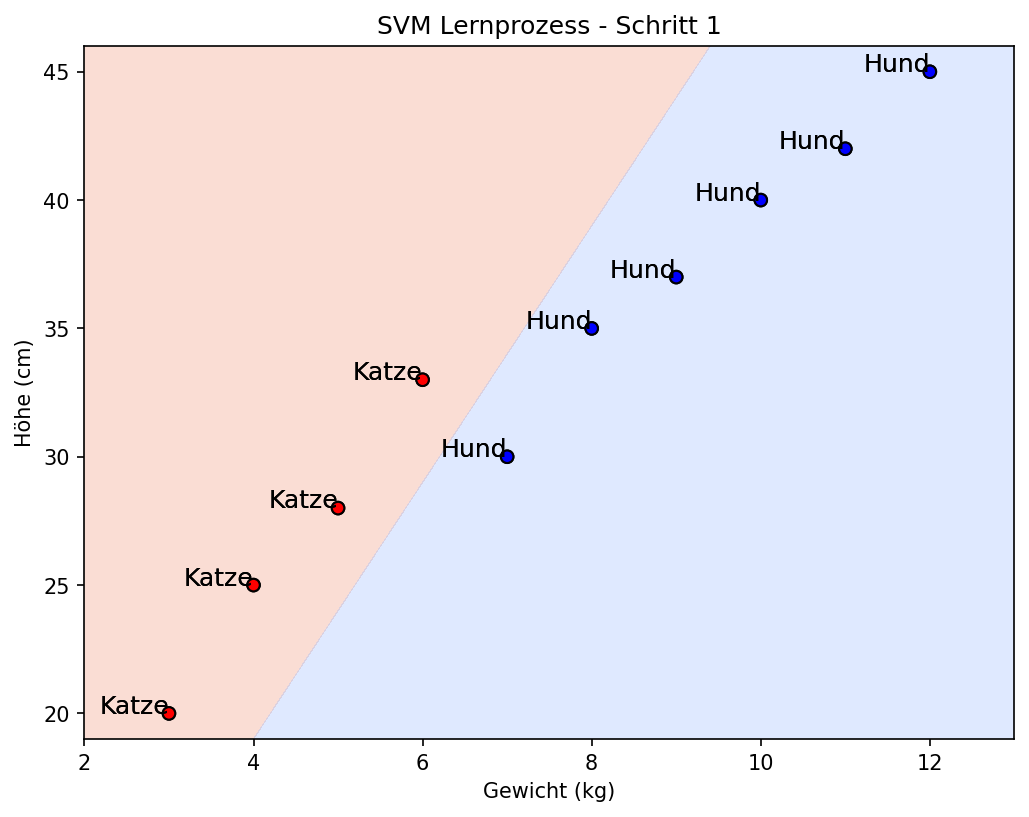

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.animation import FuncAnimation

# Daten für Klassifikation (Hund vs. Katze)
gewicht = np.array([10, 4, 8, 3, 12, 7, 5, 6, 11, 9])
höhe = np.array([40, 25, 35, 20, 45, 30, 28, 33, 42, 37])
tier = ['Hund', 'Katze', 'Hund', 'Katze', 'Hund', 'Hund', 'Katze', 'Katze', 'Hund', 'Hund']

# Umwandlung in binäre Labels (Hund=1, Katze=0)
y_klassifikation = np.array([1 if t == 'Hund' else 0 for t in tier])
X_klassifikation = np.column_stack((gewicht, höhe))

farben = ['blue' if t == 'Hund' else 'red' if t == 'Katze' else 'green' for t in tier]

# Initialisiere das SVM-Modell
model = SVC(kernel='linear')

# Figur und Achsen erstellen
fig, ax = plt.subplots(figsize=(8, 6))

# Erstelle einen Meshgrid für die Entscheidungsgrenzen
x_min, x_max = gewicht.min() - 1, gewicht.max() + 1
y_min, y_max = höhe.min() - 1, höhe.max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Scatter plot der Datenpunkte
sc = ax.scatter(gewicht, höhe, color=farben, edgecolors='k')

# Funktion für die Animation
def update(frame):
    # Trainiere das Modell schrittweise, aber nur wenn genügend Klassen vorhanden sind
    if frame > 0:
        # Train the model on the current subset of data
        model.fit(X_klassifikation[:frame+1], y_klassifikation[:frame+1])
    
    # Vorhersagen für das Meshgrid, nur wenn das Modell bereits trainiert wurde
    if frame > 0:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Lösche die vorherige Kontur
        ax.clear()
        
        # Zeichne die Entscheidungsgrenze
        ax.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.3, cmap='coolwarm_r')
    
    # Scatter plot der Datenpunkte
    ax.scatter(gewicht, höhe, color=farben, edgecolors='k')
    
    # Achsen beschriften
    ax.set_title('SVM Lernprozess - Schritt {}'.format(frame + 1))
    ax.set_xlabel('Gewicht (kg)')
    ax.set_ylabel('Höhe (cm)')
    
    # Labels für Punkte hinzufügen
    for i, t in enumerate(tier):
        ax.text(gewicht[i], höhe[i], t, fontsize=12, ha='right')
%matplotlib inline

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
# Animation erstellen
ani = FuncAnimation(fig, update, frames=len(gewicht), interval=3500, repeat=True, repeat_delay=5000)

# Animation als GIF speichern
ani.save('svm_learning_process.gif', writer='pillow')
# 

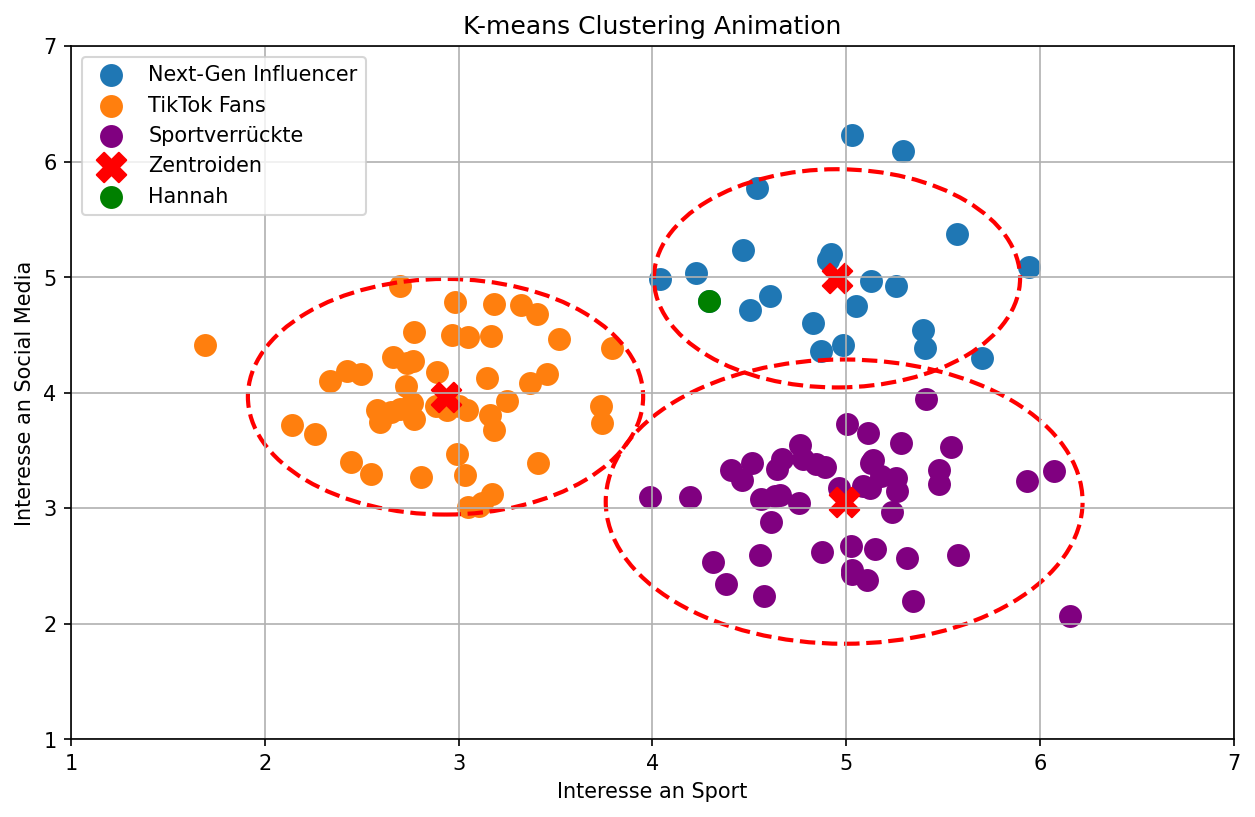

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation

%matplotlib inline

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

# Simulate data for friends based on interests
np.random.seed(42)  # For reproducibility

# Generate random data for three clusters
# Cluster 1: Interests in Sports (e.g., Soccer)
cluster_1 = np.random.normal(loc=[3, 4], scale=0.5, size=(50, 2))

# Cluster 2: Interests in Arts (e.g., Dance, Art)
cluster_2 = np.random.normal(loc=[5, 5], scale=0.5, size=(20, 2))

# Cluster 3: Interests in Technology (e.g., Video Games, Movies)
cluster_3 = np.random.normal(loc=[5, 3], scale=0.5, size=(50, 2))

# Combine the clusters to form the dataset
X = np.vstack((cluster_1, cluster_2, cluster_3))

# Prepare for animation
fig, ax = plt.subplots(figsize=(10, 6))

# Number of clusters
n_clusters = 3

# Randomly initialize centroids
centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

# Initialize empty labels
labels = np.zeros(X.shape[0])

# Scatter plot for initial data points
sc = ax.scatter(X[:, 0], X[:, 1], s=100, c='grey', label='Datenpunkte')

# Plot the initial centroids
ax.scatter(X[:, 0][50],X[:, 1][50],  color='green', marker='o', s=100, label='Hannah')

# Customizing the plot
ax.set_title('K-means Clustering')
ax.set_xlabel('Interesse an Sport')
ax.set_ylabel('Interesse an Social Media')
ax.set_xlim(1, 7)
ax.set_ylim(1, 7)
ax.legend()
ax.grid(True)

# Animation update function
def update(frame):
    global centroids, labels
    
    # Step 1: Assign labels based on the closest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Step 2: Calculate new centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(n_clusters)])

    # Clear the axis
    ax.clear()

    # Plot the current state of the clusters
    group_names = ["Next-Gen Influencer", "TikTok Fans", "Sportverrückte"]
    colors = ['#1f77b4', '#ff7f0e', 'purple']  # Better colors: blue, orange, green
    for i, group_name, color in zip(range(n_clusters), group_names, colors):
        ax.scatter(X[labels == i, 0], X[labels == i, 1], label=group_name, color=color, s=100)
        
        # Calculate the maximum distance for the circle radius
        if np.any(labels == i):
            cluster_points = X[labels == i]
            distances_to_centroid = np.linalg.norm(cluster_points - centroids[i], axis=1)
            radius = np.max(distances_to_centroid)
            
            # Draw the circle around the cluster
            circle = Circle(centroids[i], radius - 0.3, color='r', fill=False, linestyle='--', linewidth=2)
            ax.add_patch(circle)

    # Update centroids
    ax.scatter(new_centroids[:, 0], new_centroids[:, 1], color='red', marker='X', s=200, label='Zentroiden')
    
    ax.scatter(X[:, 0][50],X[:, 1][50],  color='green', marker='o', s=100, label='Hannah')

    # Update the centroids for the next frame
    centroids = new_centroids

    # Customizing the plot for each frame
    ax.set_title('K-means Clustering Animation')
    ax.set_xlabel('Interesse an Sport')
    ax.set_ylabel('Interesse an Social Media')
    ax.set_xlim(1,7)
    ax.set_ylim(1,7)
    ax.legend()
    ax.grid(True)


FuncAnimation(fig, update, frames=4, interval=4000)
# Save the animation as a GIF (optional)
# ani.save('kmeans_animation.gif', writer='pillow')

# # Show the plot
# plt.tight_layout()
# plt.show()